In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import train and test datasets

In [2]:
train = pd.read_csv('train.csv')

test = pd.read_csv('test.csv')


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Dropping 'PassengerId' and 'Name' features, since we will not use them in prediction

In [5]:
train.drop(['PassengerId','Name'], axis = 'columns', inplace = True)

test.drop(['PassengerId','Name'], axis = 'columns', inplace = True)

### Dataset information

In [6]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


### Target feature is 'Survived' ( 0 - not survived, 1 - survived )

In [7]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

## Exploratory data analysis

### Data visualization

### Survival rate based on gender. As we can see, women and children were the priority during rescue.

Text(0, 0.5, 'Frequency Count')

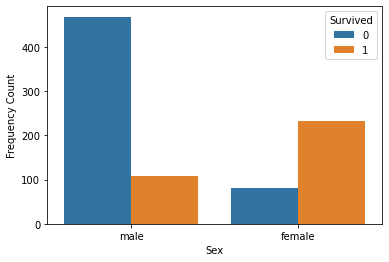

In [8]:
sns.countplot(x = 'Sex', hue = 'Survived', data = train)
plt.ylabel('Frequency Count')

### Survival rate based on passenger class. First class has visibly higher rate of rescue in comparison to second and third class.

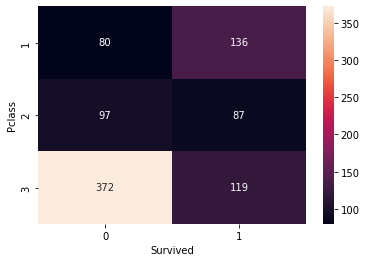

In [9]:
pclass_survived = train.groupby(['Pclass', 'Survived']).size().unstack()

sns.heatmap(pclass_survived, annot = True, fmt = 'd');

### Adding New Feature for Passengers with Family and Single Passenger. Family Feature consist of Total Number of Members in the Family of Passengers.

In [10]:
train['Family'] = train['Parch'] + train['SibSp']  # Parents - Children + Siblings - Spouses

train['Single'] = np.where(train['Family'] == 0, 1,0)

In [11]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Single
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,1,0
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,1


### Categorical Plot for passengers with family

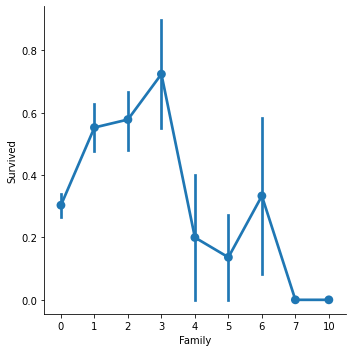

In [12]:
sns.catplot(x = 'Family', y = 'Survived', data = train, kind = 'point');

### Categorical Plot for single passengers

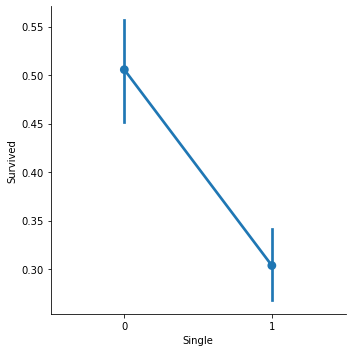

In [13]:
sns.catplot(x = 'Single', y = 'Survived', data = train, kind = 'point');

### Survival based on fare. Passengers who paid higher fares had higher survival rate.

In [14]:
train['Fare Range'] = pd.qcut(train['Fare'], 4)

<AxesSubplot:xlabel='Fare Range', ylabel='Survived'>

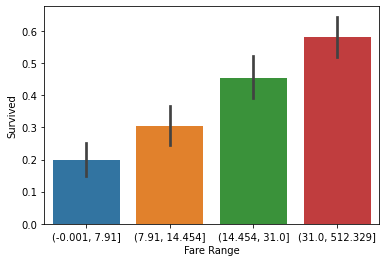

In [15]:
sns.barplot(x = 'Fare Range', y = 'Survived', data = train)

### Age distribution

<Figure size 576x432 with 0 Axes>

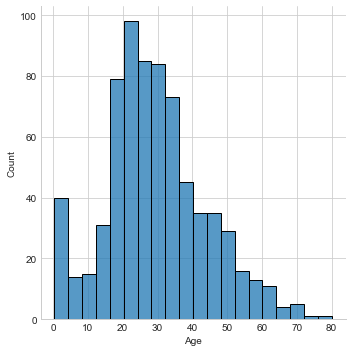

In [16]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (8,6))
sns.displot(train['Age'].dropna(), kde = False)

## Data preprocessing

### Dropping the Columns Created for Exploratory Data Analysis.

In [17]:
train.drop(['Family', 'Single', 'Fare Range'], axis = 'columns', inplace = True)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


### Target feature - Survived 

In [18]:
Y_train = train['Survived']

### Dropping Target Feature.

In [19]:
train.drop('Survived', axis = 'columns', inplace = True)

### Adding a columns for splitting data to train and test data sets.

In [20]:
train['Data'] = 'train'

test['Data'] = 'test'

### Concatenating train and test data sets for data preprocessing.

In [21]:
titanic = pd.concat([train, test], axis = 'rows')

print(f'Train Data Set : {train.shape} \nTest Data Set : {test.shape} \nConcatenated Data Set : {titanic.shape}')

Train Data Set : (891, 10) 
Test Data Set : (418, 10) 
Concatenated Data Set : (1309, 10)


### Dropping unnecessary features.

In [22]:
titanic.drop(['Ticket','Fare', 'Cabin'], axis = 'columns', inplace = True)

print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Sex       1309 non-null   object 
 2   Age       1046 non-null   float64
 3   SibSp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Embarked  1307 non-null   object 
 6   Data      1309 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 81.8+ KB
None


### Converting sex feature to numerical.

In [23]:
titanic['Sex'] = np.where(titanic['Sex'] == 'male', 1, 0)

titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Sex       1309 non-null   int32  
 2   Age       1046 non-null   float64
 3   SibSp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Embarked  1307 non-null   object 
 6   Data      1309 non-null   object 
dtypes: float64(1), int32(1), int64(3), object(2)
memory usage: 76.7+ KB


### Checking missing values.

In [24]:
titanic.isnull().sum()

Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Embarked      2
Data          0
dtype: int64

### Importing SimpleImputer library to fill missing values.

In [25]:
from sklearn.impute import SimpleImputer

### Imputing missing data in age with the mean of age data.


In [26]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')

imputer.fit(titanic[['Age']])

titanic[['Age']] = imputer.transform(titanic[['Age']])

### Imputing missing categorical data with the most frequent data in embarked.

In [27]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

imputer.fit(titanic[['Embarked']])

titanic[['Embarked']] = imputer.transform(titanic[['Embarked']])

### Converting age to integer.

In [28]:
titanic['Age'] = titanic['Age'].astype(int)

In [29]:
titanic.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
Data        0
dtype: int64

In [30]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Pclass    1309 non-null   int64 
 1   Sex       1309 non-null   int32 
 2   Age       1309 non-null   int32 
 3   SibSp     1309 non-null   int64 
 4   Parch     1309 non-null   int64 
 5   Embarked  1309 non-null   object
 6   Data      1309 non-null   object
dtypes: int32(2), int64(3), object(2)
memory usage: 71.6+ KB


### Embarked feature is categorical. Label encoding the embarked feature to convert categorical data into numeric data.

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
label_encoder = LabelEncoder()

In [33]:
titanic['Embarked'] = label_encoder.fit_transform(titanic['Embarked'])

titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Data
0,3,1,22,1,0,2,train
1,1,0,38,1,0,0,train
2,3,0,26,0,0,2,train
3,1,0,35,1,0,2,train
4,3,1,35,0,0,2,train


In [34]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Pclass    1309 non-null   int64 
 1   Sex       1309 non-null   int32 
 2   Age       1309 non-null   int32 
 3   SibSp     1309 non-null   int64 
 4   Parch     1309 non-null   int64 
 5   Embarked  1309 non-null   int32 
 6   Data      1309 non-null   object
dtypes: int32(3), int64(3), object(1)
memory usage: 66.5+ KB


## Preparation for machine learning is complete.


### Splitting the data into train and test features.

In [35]:
train = titanic[titanic['Data'] == 'train']

test = titanic[titanic['Data'] == 'test']

In [36]:
train = train.drop('Data', axis = 'columns')
test = test.drop('Data', axis = 'columns')

In [37]:
print(f'Training Data Set : {train.shape} Testing Data Set : {test.shape}')

Training Data Set : (891, 6) Testing Data Set : (418, 6)


### Importing StandardScaler


In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()

In [40]:
X_train = scaler.fit_transform(train)
X_test = scaler.fit_transform(test)

In [41]:
X_train

array([[ 0.82737724,  0.73769513, -0.58004441,  0.43279337, -0.47367361,
         0.58595414],
       [-1.56610693, -1.35557354,  0.65011226,  0.43279337, -0.47367361,
        -1.9423032 ],
       [ 0.82737724, -1.35557354, -0.27250525, -0.4745452 , -0.47367361,
         0.58595414],
       ...,
       [ 0.82737724, -1.35557354, -0.04185087,  0.43279337,  2.00893337,
         0.58595414],
       [-1.56610693,  0.73769513, -0.27250525, -0.4745452 , -0.47367361,
        -1.9423032 ],
       [ 0.82737724,  0.73769513,  0.18880351, -0.4745452 , -0.47367361,
        -0.67817453]])

## Classification models


## 1.Logistic regression

In [42]:
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(random_state = 1)

In [43]:
lr_classifier.fit(X_train, Y_train)

LogisticRegression(random_state=1)

### Prediction made by logistic regression classifier on test data.

In [44]:
Y_prediction = lr_classifier.predict(X_test)

In [45]:
from sklearn.model_selection import cross_val_score

### Evaluating estimated performance.

In [46]:
lr_score = cross_val_score(lr_classifier, X_train, Y_train, cv = 10, scoring = 'accuracy').mean()

print(f'Cross Validation Score of Logistic Regression Classifier : {lr_score*100:.2f}%')

Cross Validation Score of Logistic Regression Classifier : 79.57%


## 2.K nearest neighbors

In [47]:
from sklearn.neighbors import KNeighborsClassifier

KNN_classifier = KNeighborsClassifier(n_neighbors = 5)

In [48]:
KNN_classifier.fit(X_train, Y_train)

KNeighborsClassifier()

### Prediction made by K Nearest Neighbors classifier on test data.

In [49]:
Y_prediction = KNN_classifier.predict(X_test)

### Evaluation

In [50]:
KNN_score = cross_val_score(KNN_classifier, X_train, Y_train, cv = 10, scoring = 'accuracy').mean()

print(f'Cross Validation Score of K Nearest Neighbors Classifier : {KNN_score*100:.2f}%')

Cross Validation Score of K Nearest Neighbors Classifier : 79.46%


## 3.Decision tree classifier

In [51]:
from sklearn.tree import DecisionTreeClassifier

DT_classifier = DecisionTreeClassifier()

In [52]:
DT_classifier.fit(X_train, Y_train)

DecisionTreeClassifier()

In [53]:
Y_prediction = DT_classifier.predict(X_test)

In [54]:
DT_score = cross_val_score(DT_classifier, X_train, Y_train, cv = 10, scoring = 'accuracy').mean()

print(f'Cross Validation Score of Decision Tree Classifier : {DT_score*100:.2f}%')

Cross Validation Score of Decision Tree Classifier : 78.91%


## 4.Random forest classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier

RF_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 1)

In [56]:
RF_classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1)

In [57]:
Y_prediction = RF_classifier.predict(X_test)

In [58]:
RF_score = cross_val_score(RF_classifier, X_train, Y_train, cv = 10, scoring = 'accuracy').mean()

print(f'Cross Validation Score of Random Forest Classifier : {RF_score*100:.2f}%')

Cross Validation Score of Random Forest Classifier : 81.49%


## 5.Support vector classifier

In [59]:
from sklearn.svm import SVC

SV_classifier = SVC()

In [60]:
SV_classifier.fit(X_train, Y_train)

SVC()

In [61]:
Y_prediction = SV_classifier.predict(X_test)

In [62]:
SVC_score = cross_val_score(SV_classifier, X_train, Y_train, cv = 10, scoring = 'accuracy').mean()

print(f'Cross Validation Score of Suppport Vector Classifier : {SVC_score*100:.2f}%')

Cross Validation Score of Suppport Vector Classifier : 82.38%


## Data frame representing accuracy scores of used classifiers.

In [63]:
Accuracy = pd.DataFrame({'Classifier' : ['Logistic Regression', 'K Nearest Neighbors', 'Decision Tree', 'Random Forest', 'Support Vector'],
'Score' : [lr_score, KNN_score, DT_score, RF_score, SVC_score]},
columns = ['Classifier', 'Score'])

In [64]:
print(Accuracy)

            Classifier     Score
0  Logistic Regression  0.795743
1  K Nearest Neighbors  0.794644
2        Decision Tree  0.789089
3        Random Forest  0.814869
4       Support Vector  0.823820


### Importing test data set for selecting PassengerId column.

In [65]:
test = pd.read_csv('test.csv')

### Creating data frame for submission of predictions.

In [66]:
submission = pd.DataFrame({'PassengerId' : test['PassengerId'],
'Survived' : Y_prediction})

In [67]:
print(submission['Survived'].value_counts())

0    286
1    132
Name: Survived, dtype: int64


In [68]:
submission.to_csv('Titanic_Prediction.csv', index = False)